# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: appointment.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('appointment.csv')
print(data.shape)
data.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data.columns = ['Gender','Age','Neighbourhood','Scholar','Hipertension','Diabetes','Alcoholism','Handicap','SMS','Attend']
data.head()

,Gender,Age,Neighbourhood,Scholar,Hipertension,Diabetes,Alcoholism,Handicap,SMS,Attend
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Exploration

No     88208
Yes    22319
Name: Attend, dtype: int64


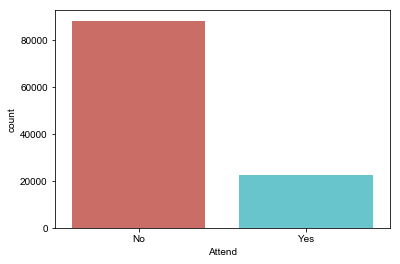

In [4]:
print(data['Attend'].value_counts())

sns.countplot(x='Attend',data = data, palette='hls',order = data['Attend'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

F    71840
M    38687
Name: Gender, dtype: int64


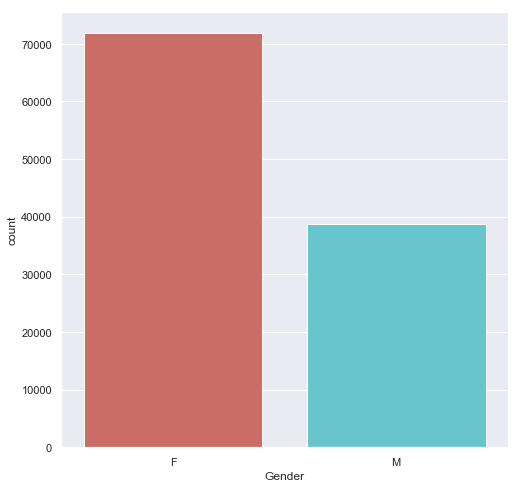

In [5]:
print(data['Gender'].value_counts())

sns.countplot(x='Gender',data = data, palette='hls',order = data['Gender'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [6]:
data.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholar          0
Hipertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMS              0
Attend           0
dtype: int64

## Convert Categorical to Numerical

In [7]:
data["Gender"] = data["Gender"].astype('category')
data["Gender*"] = data["Gender"].cat.codes  

data["Neighbourhood"] = data["Neighbourhood"].astype('category')
data["Neighbourhood*"] = data["Neighbourhood"].cat.codes  

data["Attend"] = data["Attend"].astype('category')
data["Attend*"] = data["Attend"].cat.codes 

data.head()

,Gender,Age,Neighbourhood,Scholar,Hipertension,Diabetes,Alcoholism,Handicap,SMS,Attend,Gender*,Neighbourhood*,Attend*
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,39,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,39,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,45,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,54,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,39,0


## Correlation

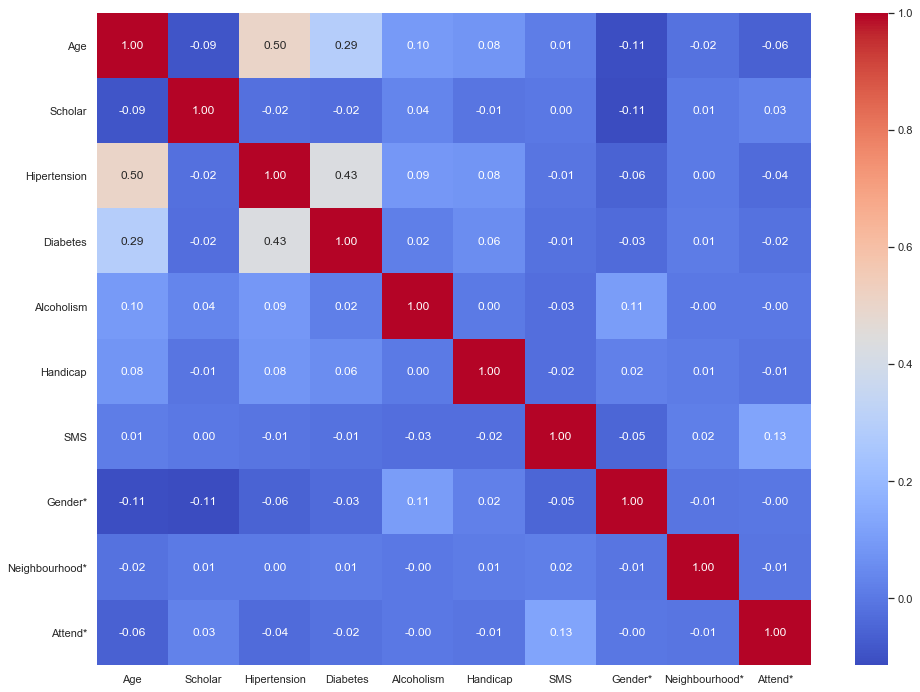

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [9]:
corr_rank = data.corr()
corr_rank["Attend*"].sort_values(ascending=False)

Attend*           1.000000
SMS               0.126431
Scholar           0.029135
Alcoholism       -0.000196
Gender*          -0.004119
Handicap         -0.006076
Neighbourhood*   -0.008962
Diabetes         -0.015180
Hipertension     -0.035701
Age              -0.060319
Name: Attend*, dtype: float64

## Data Processing and Selection

In [10]:
X = data[['SMS','Scholar','Alcoholism','Gender*','Handicap','Neighbourhood*','Diabetes','Hipertension','Age']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (110527, 9)


array([[ 0,  0,  0,  0,  0, 39,  0,  1, 62],
       [ 0,  0,  0,  1,  0, 39,  0,  0, 56]], dtype=int64)

In [11]:
y = data[['Attend*']].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (110527, 1)


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

## Data Normalization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (110527, 9)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.68761155, -0.33011206, -0.1770676 , -0.73383659, -0.13772244,
        -0.12241048, -0.27826108,  2.01737783,  1.07793239],
       [-0.68761155, -0.33011206, -0.1770676 ,  1.36270119, -0.13772244,
        -0.12241048, -0.27826108, -0.49569297,  0.81830565]])

## Split Train Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (77368, 9) (77368, 1)
X TEST Set :  (33159, 9) (33159, 1)


## Gradient Boosting Classifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Square               : -0.2527
Mean Absolute Error    : 0.2015
Mean Squared Error     : 0.2015
Root Mean Squared Error: 0.4489
Accuracy               : 0.7985
Precision              : 0.0
Recall                 : 0.0


## Data Prediction

In [15]:
df_pred1 = data[data.index == 50]
df_pred2 = data[data.index == 51]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Gender,Age,Neighbourhood,Scholar,Hipertension,Diabetes,Alcoholism,Handicap,SMS,Attend,Gender*,Neighbourhood*,Attend*
50,F,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,0,26,1
51,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,0,26,1


In [16]:
Xp = df_pred[['SMS','Scholar','Alcoholism','Gender*','Handicap','Neighbourhood*','Diabetes','Hipertension','Age']].values
Xp = scaler.transform(Xp)

y = df_pred[['Attend*']].values

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
GB_pred = gb.predict(Xp)
GB_pred

array([0, 0], dtype=int8)